<a href="https://colab.research.google.com/github/NeznaikanaLune/MISIS_DS_Masters_degree_2020/blob/master/smriz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Проблема


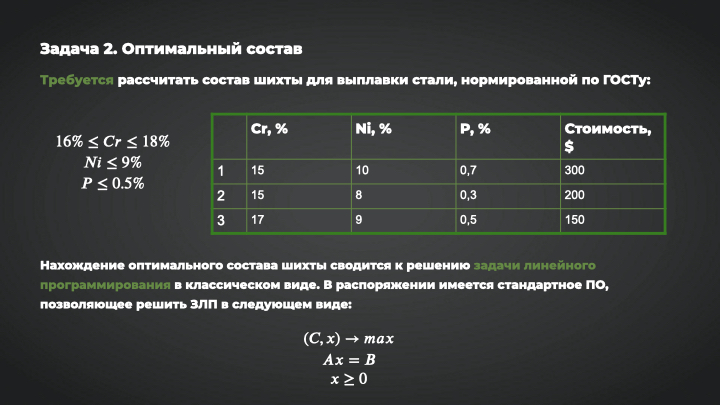

# 2. Содержательная постановка задачи

Определить оптимальный состав шихты для выплавки стали, котрый нормирован по ГОСТу и имеет минимальную стоимость материалов.

# 3. Формальная математическая модель

$X_1,X_2,X_3$ - доля определенной шихты/смеси для выплавки стали

**Ограничения по ГОСТу:**




$\begin{equation*}
\left\{
  \begin{array}{lr}
  0.15x_1 + 0.15x_2 + 0.17x_3 \geq 0.16\\
  0.15x_1 + 0.15x_2 + 0.17x_3 \leq 0.18\\
  0.10x_1 + 0.08x_2 + 0.09x_3 \leq 0.09\\
  0.007x_1 + 0.003x_2 + 0.005x_3 \leq 0.005\\
  x \geq 0\\
  \end{array}
\right.
\end{equation*}$




$\sum x= 1$ - используется хотя бы 1н исходный сплав

**Целевая функция (минимизируем стоимость):**

$(Price,x)\rightarrow \min$

В условии указано, что в нашем распоряжее ПО, которое позволяет решать задачу вида:

$(Price,x)\rightarrow \max$

Можно перейти к задаче минимизации:

$min(F(x))=-max(-F(x))$

(Price,x)=300x1+200x2+150x3→min

# 4. Алгоритм и ПО

•	Python; 

•	Numpy - open-source модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций;

•	cvxpy-python модуль для решения задач выпуклой оптимизации.


# 5. Решение задачи

In [ ]:
import numpy as np
import cvxpy

C = np.array([[0.15,0.10,0.007],[0.15,0.08,0.003],[0.17,0.09,0.005]])

Price = -np.array([[300],[250],[150]]) # вектор отрицательный, чтобы решать задачу минимизации

x = cvxpy.Variable(shape=(1,C.shape[0]), integer = False)
total_cost = x*Price
C0 = x>=0
C1 = cvxpy.sum(x,axis=1)==1
C2 = x*C[:,0] >=0.16
C3 = x*C[:,0] <=0.18
C4 = x*C[:,1]<=0.09
C5 = x*C[:,2]<=0.005

problem = cvxpy.Problem(cvxpy.Maximize(total_cost), constraints=[C0,C1,C2,C3,C4,C5],)
print('Стоимость:',problem.solve()*(-1),'\nСостав:',np.round(x.value))

Стоимость: 149.99999999838172 
Состав: [[-0.  0.  1.]]


In [ ]:
# Модуль cvxpy позволяет решать сразу задачу минимизации. Продемоснстрирую это
import numpy as np
import cvxpy

C = np.array([[0.15,0.10,0.007],[0.15,0.08,0.003],[0.17,0.09,0.005]])

Price = np.array([[300],[200],[150]])

x = cvxpy.Variable(shape=(1,C.shape[0]), integer = False)
total_cost = x*Price
C0 = x>=0
C1 = cvxpy.sum(x,axis=1)==1
C2 = x*C[:,0] >=0.16
C3 = x*C[:,0] <=0.18
C4 = x*C[:,1]<=0.09
C5 = x*C[:,2]<=0.005

problem = cvxpy.Problem(cvxpy.Minimize(total_cost), constraints=[C0,C1,C2,C3,C4,C5],)
print('Стоимость:',problem.solve(),'\nСостав:',np.round(x.value))

Стоимость: 149.99999999502313 
Состав: [[-0. -0.  1.]]


# 6. Анализ полученных результатов

Получен ответ - использовать только третий вариант смеси. Такой результат можно объяснить тем, что минизировалась функция стоимости при наложенных ограничениях.